Duvall Pinkney week 5 homework

This homework assignment aims to build a simple linear regression model using the `radio` feature. 
(Source of data: https://www.statlearning.com/s/Advertising.csv)


1. Apply the normal equation to calculate parameter values for the best fit.

2. Display the regression line with the training data points.

3. Use `sklearn` to build the same model. Verify that the parameters values are the same as those from the normal equation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://www.statlearning.com/s/Advertising.csv"
dataframe = pd.read_csv(url)
dataframe.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
dataframe.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
dataframe.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [7]:
# Train a linear regression model using sklearn
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(dataframe[['TV']], dataframe[['sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# The coef_ and intercept_ attributes contain parameter values
print(model_lr.coef_)
print(model_lr.intercept_)

[[0.04753664]]
[7.03259355]


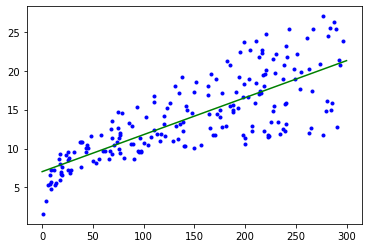

In [10]:
# Plot the data points and the optimal regression line.
m = model_lr.coef_[0, 0]   # slope
b = model_lr.intercept_[0] # y-intercept

plt.plot(dataframe['TV'], dataframe['sales'], 'b.')
x_coordinates = np.array([0,300])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')

In [11]:
# Write a function that produces the squared error given beta0, beta1, data, and i
def get_squared_error(beta0, beta1, dataframe, i):
    """
    This function returns the squared error on Record i.
    """
    
    x = dataframe.loc[i, 'TV']
    y = dataframe.loc[i, 'sales']

    prediction = beta0 + beta1 * x

    squared_error = (y - prediction) ** 2

    return squared_error

In [13]:
# Example:
# Calculate the squared error of the model on the first record.

beta0 = 7.03
beta1 = 0.04

x1 = dataframe.loc[1, 'TV'] # 230.1
y1 = dataframe.loc[1, 'sales'] #22.1
print("x1, y1:", x1, y1)

# Calculate f(x1) = beta0 + beta1 * x1
prediction1 = beta0 + beta1 * x1
print("Prediction on Record 1:", prediction1)

# Calculate the squared error (y1 - f(x1)) ** 2
error1 = (y1 - prediction1) ** 2
print("Squared error on Record 1:", error1)

x1, y1: 44.5 10.4
Prediction on Record 1: 8.81
Squared error on Record 1: 2.5280999999999993


In [14]:
# Example:
# Calculate the squared error of the model on an arbitrary record.

beta0 = 7.03
beta1 = 0.04

i = 123  # index of the record
xi = dataframe.loc[i, 'TV']
yi = dataframe.loc[i, 'sales']
print("xi, yi:", xi, yi)

# Calculate f(xi)
predictioni = beta0 + beta1 * xi

# Calculate the squared error (yi - f(xi)) ** 2
errori = (yi - predictioni) ** 2

print("Squared error:", errori)

xi, yi: 123.1 15.2
Squared error: 10.536515999999992


In [16]:
get_squared_error(beta0, beta1, dataframe, i)

10.536515999999992

X = np.array([0,300])

In [25]:
X = np.hstack([np.ones([200, 0]),dataframe[["TV"]].values])
print(X)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [26]:
y = dataframe[["sales"]].values
print(y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


In [28]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T)
print("Theta: ", theta)

Theta:  [[3.97332578e-05 7.68418067e-06 2.97006534e-06 2.61607499e-05
  3.12202217e-05 1.50230049e-06 9.92899750e-06 2.07559217e-05
  1.48503267e-06 3.45011078e-05 1.14140302e-05 3.70740133e-05
  4.10974157e-06 1.68361262e-05 3.52436242e-05 3.37413237e-05
  1.17075831e-05 4.85916504e-05 1.19493326e-05 2.54355014e-05
  3.77129227e-05 4.09938088e-05 2.27935247e-06 3.94224370e-05
  1.07578529e-05 4.53971033e-05 2.46757173e-05 4.14600400e-05
  4.29623405e-05 1.21910821e-05 5.05774499e-05 1.94953707e-05
  1.67843227e-05 4.58633345e-05 1.65253054e-05 5.01975578e-05
  4.60878162e-05 1.28990628e-05 7.44243117e-06 3.93706336e-05
  3.49673390e-05 3.05640445e-05 5.06983246e-05 3.57271232e-05
  4.33422326e-06 3.02359559e-05 1.54892361e-05 4.14255043e-05
  3.92324910e-05 1.15521727e-05 3.45011078e-05 1.73368930e-05
  3.73675662e-05 3.15310425e-05 4.53625677e-05 3.43456974e-05
  1.26055099e-06 2.35187732e-05 3.64005682e-05 3.63833004e-05
  9.23828463e-06 4.51208182e-05 4.13218974e-05 1.77340529e-05
